In [1]:
! pip install collections-extended
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install yake
! pip install rake_nltk
! pip install unidecode
! pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=1dbf51a615754237c5e6f0c48ac352f36bffae11c11144ec0206c255406c5b19
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 k

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
# from collections import Counter
# l1 = [2,3,4,44,4,4,44,4,2,2,2,2]
# count = Counter(l1)
# # print(count)
# # count.most_common(1)[0][0]
# count.most_common(2)[1][0]

In [3]:
# importing libraries
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [4]:
data = pd.read_csv('dataset_es_train.csv')
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [5]:
data.shape

(200000, 8)

In [6]:
sample = data.sample(1000)
sample.reset_index(drop=True,inplace=True)

In [7]:
sample

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0250503,product_es_0656312,reviewer_es_0991699,1,No me sirvió de nada. La impresora no los reco...,Para nada,es,wireless
1,es_0616722,product_es_0679996,reviewer_es_0250411,1,No recomiendo su compra al mes de adquirirlo l...,Mal ventilador,es,kitchen
2,es_0702092,product_es_0278262,reviewer_es_0962664,4,"Los cascos están bien, la calidad del sonido n...",Le falta volumen para mi gusto,es,electronics
3,es_0926710,product_es_0032993,reviewer_es_0144255,2,"Me ha llegado sin su caja original, embalado e...",Sin caja original,es,toy
4,es_0406182,product_es_0301626,reviewer_es_0125974,2,"Emite calidad de imagen, aunque poca fiabilida...","Calidad de imagen, mala estetica de noche",es,wireless
...,...,...,...,...,...,...,...,...
995,es_0470147,product_es_0966677,reviewer_es_0355725,2,No echa agua es un ventilador con potencia par...,Sin vaporizador,es,electronics
996,es_0292708,product_es_0306002,reviewer_es_0068896,2,"Es bastante pequeño, pero queda muy bonito. Co...",Pequeño pero con un diseño muy equilibrado,es,home
997,es_0287950,product_es_0768478,reviewer_es_0421814,5,Bombillas con buena iluminacion y durabilidad,Compraría otra vez,es,home_improvement
998,es_0867425,product_es_0371851,reviewer_es_0734251,2,"Pues eso, encaja, es lo que dicen pero se ve m...",Se ve endeble.,es,automotive


In [8]:
df = sample[['review_body','stars']]
df

,review_body,stars
0,No me sirvió de nada. La impresora no los reco...,1
1,No recomiendo su compra al mes de adquirirlo l...,1
2,"Los cascos están bien, la calidad del sonido n...",4
3,"Me ha llegado sin su caja original, embalado e...",2
4,"Emite calidad de imagen, aunque poca fiabilida...",2
...,...,...
995,No echa agua es un ventilador con potencia par...,2
996,"Es bastante pequeño, pero queda muy bonito. Co...",2
997,Bombillas con buena iluminacion y durabilidad,5
998,"Pues eso, encaja, es lo que dicen pero se ve m...",2


In [9]:
# language detection
def lang_detect(data):
  lang = detect(data)
  return lang

In [10]:
print(df.review_body[0])
lang_detect(df.review_body[0])

No me sirvió de nada. La impresora no los reconoce


'es'

In [11]:
df['language'] = df.review_body.apply(lang_detect)
df

,review_body,stars,language
0,No me sirvió de nada. La impresora no los reco...,1,es
1,No recomiendo su compra al mes de adquirirlo l...,1,es
2,"Los cascos están bien, la calidad del sonido n...",4,es
3,"Me ha llegado sin su caja original, embalado e...",2,es
4,"Emite calidad de imagen, aunque poca fiabilida...",2,es
...,...,...,...
995,No echa agua es un ventilador con potencia par...,2,es
996,"Es bastante pequeño, pero queda muy bonito. Co...",2,es
997,Bombillas con buena iluminacion y durabilidad,5,es
998,"Pues eso, encaja, es lo que dicen pero se ve m...",2,es


In [12]:
df.language.unique()

array(['es', 'pt', 'sw', 'it', 'en', 'so'], dtype=object)

In [13]:
df.language.value_counts()

es    981
pt     11
it      3
en      3
sw      1
so      1
Name: language, dtype: int64

In [14]:
# language translation
def lang_trans(data):
  translator = Translator()
  translated_text = translator.translate(data)
  return translated_text.text

In [15]:
print(df.review_body[0])
lang_trans(df.review_body[0])

No me sirvió de nada. La impresora no los reconoce


"It didn't help me at all. The printer does not recognize them"

In [16]:
df['translated_reviews'] = df.review_body.apply(lang_trans)
df

,review_body,stars,language,translated_reviews
0,No me sirvió de nada. La impresora no los reco...,1,es,It didn't help me at all. The printer does not...
1,No recomiendo su compra al mes de adquirirlo l...,1,es,I do not recommend purchasing it. One month af...
2,"Los cascos están bien, la calidad del sonido n...",4,es,"The headphones are good, the sound quality is ..."
3,"Me ha llegado sin su caja original, embalado e...",2,es,"It arrived to me without its original box, pac..."
4,"Emite calidad de imagen, aunque poca fiabilida...",2,es,"It emits image quality, although unreliable, r..."
...,...,...,...,...
995,No echa agua es un ventilador con potencia par...,2,es,"It does not spray water, it is a fan with powe..."
996,"Es bastante pequeño, pero queda muy bonito. Co...",2,es,"It's quite small, but it looks very nice. Unif..."
997,Bombillas con buena iluminacion y durabilidad,5,es,Bulbs with good lighting and durability
998,"Pues eso, encaja, es lo que dicen pero se ve m...",2,es,"Well, that fits, that's what they say, but it ..."


In [17]:
# ngrams
def ngram_extractor(data,ngram_range):
  tokens = word_tokenize(data)
  ngram = ngrams(tokens,ngram_range)
  ngram_list1 = []
  for ngram1 in ngram:
    ngram_list1.append(' '.join(ngram1))
  return ngram_list1

In [18]:
list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))
list_unigrams

0      [It, did, n't, help, me, at, all, ., The, prin...
1      [I, do, not, recommend, purchasing, it, ., One...
2      [The, headphones, are, good, ,, the, sound, qu...
3      [It, arrived, to, me, without, its, original, ...
4      [It, emits, image, quality, ,, although, unrel...
                             ...                        
995    [It, does, not, spray, water, ,, it, is, a, fa...
996    [It, 's, quite, small, ,, but, it, looks, very...
997       [Bulbs, with, good, lighting, and, durability]
998    [Well, ,, that, fits, ,, that, 's, what, they,...
999    [To, get, out, of, a, pinch, ,, I, do, n't, th...
Name: translated_reviews, Length: 1000, dtype: object

In [19]:
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('.', 1624),
 ('the', 1577),
 (',', 1449),
 ('it', 1396),
 ('I', 905),
 ('and', 840),
 ('is', 689),
 ('a', 635),
 ('to', 633),
 ('not', 410),
 ('for', 385),
 ('that', 378),
 ('of', 364),
 ('It', 353),
 ('in', 326),
 ('very', 326),
 ("n't", 315),
 ('but', 276),
 ('The', 275),
 ('have', 268),
 ('with', 253),
 ('you', 222),
 ('they', 214),
 ('good', 194),
 ('are', 191)]

In [20]:
# preprocessing
def expand_text(data):
  expanded_text = contractions.fix(data)
  return expanded_text

stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
  tokens = word_tokenize(data)
  clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
  return clean_text

In [21]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [22]:
clean_text

0                   [not, help, printer, not, recognize]
1      [not, recommend, purchasing, one, month, purch...
2      [headphones, good, sound, quality, not, bad, b...
3      [arrived, without, original, box, packed, brow...
4      [emits, image, quality, although, unreliable, ...
                             ...                        
995    [not, spray, water, fan, power, small, without...
996          [quite, small, looks, nice, uniform, color]
997                  [bulbs, good, lighting, durability]
998    [well, fits, say, looks, flimsy, plastic, cove...
999    [get, pinch, not, think, last, uses, poorly, d...
Name: translated_reviews, Length: 1000, dtype: object

In [23]:
list_unigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),1))
final_unigram = []
for unigram in list_unigrams:
  final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(250)
cnt

[('not', 762),
 ('good', 249),
 ('well', 149),
 ('one', 141),
 ('like', 124),
 ('product', 119),
 ('quality', 110),
 ('little', 108),
 ('time', 86),
 ('use', 80),
 ('arrived', 79),
 ('price', 75),
 ('perfect', 72),
 ('bought', 68),
 ('recommend', 65),
 ('would', 64),
 ('works', 60),
 ('bad', 57),
 ('expected', 57),
 ('since', 55),
 ('without', 53),
 ('put', 52),
 ('much', 50),
 ('even', 50),
 ('work', 49),
 ('quite', 48),
 ('lot', 48),
 ('small', 47),
 ('case', 46),
 ('better', 46),
 ('buy', 45),
 ('also', 45),
 ('great', 44),
 ('thing', 43),
 ('perfectly', 43),
 ('size', 41),
 ('easy', 41),
 ('comes', 41),
 ('come', 41),
 ('looks', 40),
 ('although', 39),
 ('another', 39),
 ('battery', 38),
 ('comfortable', 38),
 ('everything', 38),
 ('came', 38),
 ('purchase', 37),
 ('fit', 37),
 ('long', 37),
 ('fits', 36),
 ('first', 36),
 ('two', 36),
 ('could', 35),
 ('used', 34),
 ('get', 34),
 ('months', 34),
 ('problem', 34),
 ('return', 33),
 ('screen', 33),
 ('plastic', 31),
 ('think', 31),


In [24]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),2))
final_bigram = []
for bigram in list_bigrams:
  final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('not recommend', 31),
 ('not work', 31),
 ('not like', 29),
 ('good quality', 26),
 ('not know', 25),
 ('not fit', 19),
 ('product not', 18),
 ('not bad', 17),
 ('not even', 17),
 ('works well', 17),
 ('good product', 16),
 ('good price', 14),
 ('not come', 14),
 ('not buy', 13),
 ('another one', 12),
 ('would not', 12),
 ('works perfectly', 12),
 ('long time', 12),
 ('fits perfectly', 11),
 ('poor quality', 11),
 ('price not', 11),
 ('quality price', 10),
 ('not give', 10),
 ('well packaged', 10),
 ('value money', 10)]

In [25]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt

[('good value money', 9),
 ('not fit well', 7),
 ('buy another one', 6),
 ('not work well', 6),
 ('would not buy', 5),
 ('leaves lot desired', 5),
 ('battery not last', 5),
 ('price not ask', 4),
 ('not last long', 4),
 ('took long time', 4),
 ('good sound quality', 3),
 ('looks good quality', 3),
 ('better spend little', 3),
 ('not recommend purchase', 3),
 ('touch screen not', 3),
 ('instructions english not', 3),
 ('year old son', 3),
 ('cover entire screen', 3),
 ('not like not', 3),
 ('not understand not', 3),
 ('well not know', 3),
 ('not received order', 3),
 ('not tried yet', 3),
 ('not give stars', 3),
 ('good quality easy', 3)]

In [26]:
df.stars.unique()

array([1, 4, 2, 5, 3])

In [27]:
test = df[(df.stars.astype('int')<3)].reset_index(drop=True)
test

,review_body,stars,language,translated_reviews
0,No me sirvió de nada. La impresora no los reco...,1,es,It didn't help me at all. The printer does not...
1,No recomiendo su compra al mes de adquirirlo l...,1,es,I do not recommend purchasing it. One month af...
2,"Me ha llegado sin su caja original, embalado e...",2,es,"It arrived to me without its original box, pac..."
3,"Emite calidad de imagen, aunque poca fiabilida...",2,es,"It emits image quality, although unreliable, r..."
4,No era lo que esperaba el jabón que libera es ...,2,es,"It was not what I expected, the soap it releas..."
...,...,...,...,...
406,"Si bien el producto es de Apple y es correcto,...",2,es,Although the product is from Apple and is corr...
407,Ha llegado roto. Si no se pone una pegatina en...,2,es,It has arrived broken. If you do not put a sti...
408,No echa agua es un ventilador con potencia par...,2,es,"It does not spray water, it is a fan with powe..."
409,"Es bastante pequeño, pero queda muy bonito. Co...",2,es,"It's quite small, but it looks very nice. Unif..."


In [28]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))
final_trigram = []
for trigram in list_trigrams:
  final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt

[('not work well', 6),
 ('would not buy', 5),
 ('not fit well', 5),
 ('battery not last', 4),
 ('not recommend purchase', 3),
 ('touch screen not', 3),
 ('not received order', 3),
 ('simple nothing photos', 3),
 ('expected something better', 3),
 ('stopped working not', 2),
 ('product not bad', 2),
 ('arrived broken not', 2),
 ('not adapt well', 2),
 ('not like touch', 2),
 ('screen not work', 2),
 ('times gets stuck', 2),
 ('instructions english not', 2),
 ('better spend little', 2),
 ('not like small', 2),
 ('give money back', 2),
 ('buy another one', 2),
 ('not notice anything', 2),
 ('mobile phones not', 2),
 ('edges not stick', 2),
 ('not stick well', 2)]

In [29]:
# "R1 R2"
# Column
# R1
# R2

In [30]:
# wordcloud
def wordcloud(data,column):
  df_ = data[column].str.cat(sep=" ")
  wordcloud = WordCloud(width = 700, height=500,background_color='white').generate(df_)
  plt.figure(figsize=(10,16))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()


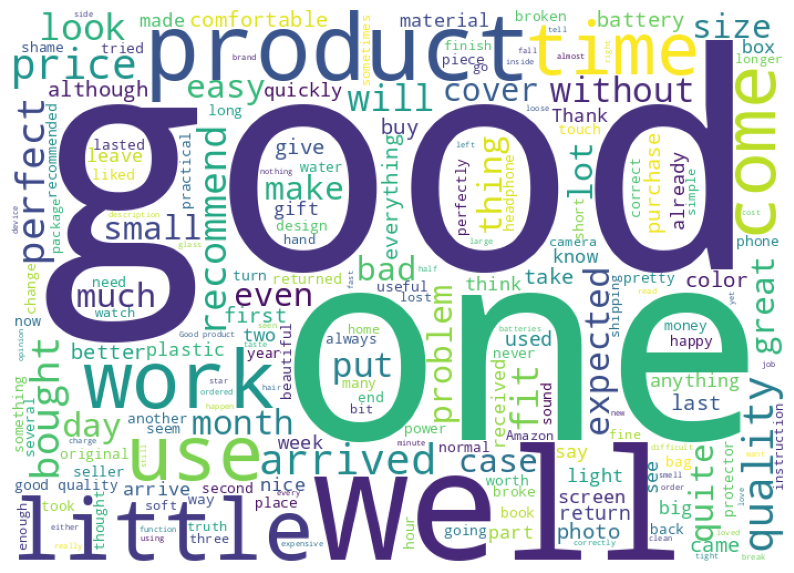

In [31]:
wordcloud(df,'translated_reviews')

In [32]:
# for
# print(end=" ")
# #


In [33]:
#Keyphrase extraction
def yake_extractor(data):
  keyword_extractor = yake.KeywordExtractor()
  keywords = keyword_extractor.extract_keywords(data)
  keyword_list = []
  for kw in keywords: # kw >> (kw,score)
    keyword_list.append(kw[0])
  return keyword_list

In [34]:
keywords = df.translated_reviews.apply(yake_extractor)
keywords

0                                   [printer, recognize]
1      [recommend purchasing, purchasing, recommend, ...
2      [noise fine, battery life, places with externa...
3      [Wise Men left, Wise Men, original box, damage...
4      [emits image quality, recommended quality, ima...
                             ...                        
995    [fan with power, spray water, water, spray, fa...
996         [Uniform color, small, nice, Uniform, color]
997    [Bulbs with good, lighting and durability, goo...
998    [sun and rain, plastic that covers, damaged a ...
999    [Poorly designed jaw, pinch, Poorly designed, ...
Name: translated_reviews, Length: 1000, dtype: object

In [35]:
all_keywords = []
for kw in keywords:
  all_keywords.extend(kw)

cnt = Counter(all_keywords).most_common(1000)
cnt


[('good', 145),
 ('product', 100),
 ('quality', 95),
 ('arrived', 70),
 ('price', 66),
 ('time', 64),
 ('bought', 56),
 ('works', 48),
 ('expected', 47),
 ('recommend', 46),
 ('Good', 45),
 ('bad', 43),
 ('perfect', 42),
 ('small', 41),
 ('put', 39),
 ('perfectly', 39),
 ('lot', 38),
 ('buy', 35),
 ('work', 35),
 ('size', 35),
 ('great', 33),
 ('thing', 31),
 ('fits', 31),
 ('case', 30),
 ('comfortable', 30),
 ('long', 30),
 ('battery', 28),
 ('months', 28),
 ('fit', 28),
 ('purchase', 27),
 ('easy', 26),
 ('days', 26),
 ('problem', 25),
 ('plastic', 24),
 ('received', 23),
 ('pretty', 23),
 ('return', 23),
 ('screen', 23),
 ('made', 22),
 ('short', 22),
 ('money', 22),
 ('returned', 21),
 ('big', 21),
 ('cover', 21),
 ('gift', 21),
 ('photo', 21),
 ('recommended', 20),
 ('quickly', 20),
 ('give', 20),
 ('box', 19),
 ('good quality', 19),
 ('phone', 19),
 ('Perfect', 18),
 ('practical', 18),
 ('broken', 18),
 ('nice', 18),
 ('worth', 18),
 ('arrive', 18),
 ('happy', 18),
 ('design', 17

In [37]:
def rake_extractor(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()

rake_keywords = df.translated_reviews.apply(rake_extractor)
rake_keywords

0                             [recognize, printer, help]
1      [ventilation protection broke, plastic clip, o...
2      [much noise fine, external noise, battery life...
3      [three wise men left, quite damaged box, origi...
4      [led emits little light, license plate obscure...
                             ...                        
995    [without water, spray water, use, small, power...
996            [uniform color, quite small, nice, looks]
997                   [good lighting, durability, bulbs]
998    [gets damaged, well, sun, say, rain, plastic, ...
999    [poorly designed jaw, expect anything else, 10...
Name: translated_reviews, Length: 1000, dtype: object

In [38]:
all_keywords = []
for kw in rake_keywords:
  all_keywords.extend(kw)

cnt = Counter(all_keywords).most_common(1000)
cnt


[('good', 79),
 ('like', 62),
 ('product', 62),
 ('bought', 58),
 ('recommend', 55),
 ('use', 52),
 ('well', 52),
 ('one', 49),
 ('expected', 48),
 ('lot', 48),
 ('price', 47),
 ('put', 45),
 ('time', 44),
 ('little', 40),
 ('arrived', 38),
 ('easy', 37),
 ('perfect', 36),
 ('work', 35),
 ('case', 35),
 ('comfortable', 34),
 ('used', 31),
 ('quality', 30),
 ('think', 30),
 ('know', 29),
 ('return', 29),
 ('buy', 28),
 ('problem', 28),
 ('come', 28),
 ('bad', 27),
 ('see', 26),
 ('small', 26),
 ('would', 25),
 ('although', 24),
 ('gift', 23),
 ('returned', 23),
 ('received', 23),
 ('since', 22),
 ('happy', 22),
 ('made', 21),
 ('purchase', 21),
 ('pretty', 21),
 ('works', 21),
 ('photo', 21),
 ('much', 20),
 ('comes', 20),
 ('arrive', 20),
 ('thing', 19),
 ('even', 19),
 ('thank', 19),
 ('battery', 19),
 ('quickly', 19),
 ('end', 19),
 ('fit', 18),
 ('nice', 18),
 ('good quality', 18),
 ('practical', 17),
 ('liked', 17),
 ('thought', 17),
 ('give', 17),
 ('big', 16),
 ('going', 16),
 ('

In [ ]:
# # KMeans >> Count Vectorizer
#          >> TFIDF
#          >> Word2Vec

In [39]:
# preprocessing
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [40]:
clean_text_train = df.translated_reviews.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)


In [41]:
clean_text_train

0                         not help printer not recognize
1      not recommend purchasing one month purchasing ...
2      headphone good sound quality not bad battery l...
3      arrived without original box packed brown quit...
4      emits image quality although unreliable recomm...
                             ...                        
995    not spray water fan power small without water ...
996                  quite small look nice uniform color
997                        bulb good lighting durability
998    well fit say look flimsy plastic cover get dam...
999    get pinch not think last us poorly designed ja...
Name: translated_reviews, Length: 1000, dtype: object

In [42]:
# Text Vectorization

count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text_train).A
pd.DataFrame(bow,columns = count_vect.get_feature_names_out())

,ability,able,abruptly,absence,absent,absolute,absolutely,absorbs,absurd,accept,...,yesterday,yet,yolanda,youthful,youtube,zebra,zero,zipper,zippo,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Tfidf
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names_out())

,ability,able,abruptly,absence,absent,absolute,absolutely,absorbs,absurd,accept,...,yesterday,yet,yolanda,youthful,youtube,zebra,zero,zipper,zippo,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# [[R1],[R2],[R3]] >> [[w1,w2,w3],[w1,w2,w3],[w1,w2,w3]]
sent = clean_text_train.tolist() # [R1,R2,R3]
splitted_sent = [sen.split() for sen in sent]
splitted_sent

[['not', 'help', 'printer', 'not', 'recognize'],
 ['not',
  'recommend',
  'purchasing',
  'one',
  'month',
  'purchasing',
  'plastic',
  'clip',
  'used',
  'close',
  'ventilation',
  'protection',
  'broke'],
 ['headphone',
  'good',
  'sound',
  'quality',
  'not',
  'bad',
  'battery',
  'life',
  'good',
  'thing',
  'taste',
  'sound',
  'little',
  'quiet',
  'environment',
  'not',
  'much',
  'noise',
  'fine',
  'yes',
  'place',
  'external',
  'noise',
  'miss',
  'little',
  'volume'],
 ['arrived',
  'without',
  'original',
  'box',
  'packed',
  'brown',
  'quite',
  'damaged',
  'box',
  'gift',
  'three',
  'wise',
  'men',
  'left',
  'buy',
  'box',
  'put'],
 ['emits',
  'image',
  'quality',
  'although',
  'unreliable',
  'recommended',
  'quality',
  'price',
  'led',
  'emits',
  'little',
  'light',
  'placed',
  'another',
  'led',
  'becomes',
  'unbalanced',
  'addition',
  'emitting',
  'shadow',
  'leaving',
  'part',
  'license',
  'plate',
  'obscured

In [46]:
word_2vec_model = Word2Vec(splitted_sent,min_count=2,window=3)#sg = 0 >>cbow, sg=1 Skipgram

In [47]:
word_2vec_model.save("word2vec.model")

In [48]:
word_2vec_model.vector_size

100

In [ ]:
# word2vec >>
# w1 = vect1
# w2 = vect2
# w3 = vect3
# R1 = w1,w2,w3
# R1_vect = avg(vect1,vect2,vect3)

In [49]:
# document numerical format
def vectorizer(list_of_docs,model):
  feature = []
  for rew in list_of_docs:
    zero_vector = np.zeros(model.vector_size)
    vectors = []
    for word in rew:
      try:
        word in model.wv
        vectors.append(model.wv[word])#model.wv['bad']
      except KeyError:
        continue
    if vectors:
      vectors = np.array(vectors)
      avg_vec = vectors.mean(axis=0)
      feature.append(avg_vec)
    else:
      feature.append(zero_vector)
  return feature


In [50]:
vectorized_docs = vectorizer(splitted_sent,word_2vec_model)

In [51]:
vectorized_docs

[array([-0.06248329,  0.07257788,  0.0117294 ,  0.00185229, -0.00602142,
        -0.12635383,  0.02960866,  0.16757938, -0.06104759, -0.03965063,
        -0.03852579, -0.10546205,  0.0079079 ,  0.02077323,  0.00383491,
        -0.06252182,  0.02705591, -0.10484622,  0.00322269, -0.13352662,
         0.06896094,  0.04363863,  0.05707914, -0.04282545, -0.00253596,
        -0.00956383, -0.07014895, -0.05920725, -0.07134977,  0.01076568,
         0.09843678,  0.01148429,  0.02963471, -0.03447709, -0.03314143,
         0.0925758 ,  0.01124911, -0.10529717, -0.05591844, -0.13187024,
         0.00489898, -0.05078176, -0.00546469, -0.00447297,  0.05533198,
        -0.03347041, -0.04101237, -0.00038716,  0.04398099,  0.052217  ,
         0.04197988, -0.06191085, -0.02938934,  0.00198903, -0.04776679,
         0.03079723,  0.04151636, -0.02055084, -0.09260642,  0.01777433,
        -0.00162249,  0.02899111, -0.0180247 , -0.03581878, -0.11251203,
         0.05242553,  0.03408924,  0.0805335 , -0.1

In [52]:
vectorized_docs[0]

array([-0.06248329,  0.07257788,  0.0117294 ,  0.00185229, -0.00602142,
       -0.12635383,  0.02960866,  0.16757938, -0.06104759, -0.03965063,
       -0.03852579, -0.10546205,  0.0079079 ,  0.02077323,  0.00383491,
       -0.06252182,  0.02705591, -0.10484622,  0.00322269, -0.13352662,
        0.06896094,  0.04363863,  0.05707914, -0.04282545, -0.00253596,
       -0.00956383, -0.07014895, -0.05920725, -0.07134977,  0.01076568,
        0.09843678,  0.01148429,  0.02963471, -0.03447709, -0.03314143,
        0.0925758 ,  0.01124911, -0.10529717, -0.05591844, -0.13187024,
        0.00489898, -0.05078176, -0.00546469, -0.00447297,  0.05533198,
       -0.03347041, -0.04101237, -0.00038716,  0.04398099,  0.052217  ,
        0.04197988, -0.06191085, -0.02938934,  0.00198903, -0.04776679,
        0.03079723,  0.04151636, -0.02055084, -0.09260642,  0.01777433,
       -0.00162249,  0.02899111, -0.0180247 , -0.03581878, -0.11251203,
        0.05242553,  0.03408924,  0.0805335 , -0.10657169,  0.08

In [53]:
type(vectorized_docs)

list

In [54]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-0.06248329,  0.07257788,  0.0117294 , ..., -0.08082549,
         0.03054838, -0.03119793],
       [-0.03845006,  0.04728917,  0.00630881, ..., -0.04528387,
         0.0221087 , -0.0214306 ],
       [-0.04102137,  0.04727445,  0.007535  , ..., -0.04865237,
         0.01668773, -0.02271582],
       ...,
       [-0.02163338,  0.03176223,  0.00752391, ..., -0.03598051,
         0.00603412, -0.00998015],
       [-0.03238021,  0.04298808,  0.00483528, ..., -0.03860658,
         0.01912095, -0.01901387],
       [-0.04319939,  0.04922778,  0.0080748 , ..., -0.05293386,
         0.01632301, -0.02296054]], dtype=float32)

In [55]:
type(x_emb)

numpy.ndarray

In [56]:
def build_kmeans(clusters,data):
  kmeans_model = KMeans(n_clusters=clusters)
  y_pred = kmeans_model.fit_predict(data)
  return kmeans_model, y_pred

In [57]:
# kmeans - count vectorizer
kmeans_model_count, count_pred = build_kmeans(3,bow)
count_pred

array([1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1,

In [58]:
# kmeans - tfidf vectorizer
kmeans_model_tfidf, tfidf_pred = build_kmeans(3,tfidf)
tfidf_pred

array([1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0,
       1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1,
       0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0,

In [59]:
# kmeans - word2vec
kmeans_model_word2vec, word2vec_pred = build_kmeans(3,x_emb)
word2vec_pred # target column

array([2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2,
       1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2,
       1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0,
       2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [60]:
# evaluation
print(f'Silhouette score with kmeans-Count : {silhouette_score(bow,count_pred)}')

print(f'Silhouette score with kmeans-tfidf : {silhouette_score(tfidf,tfidf_pred)}')

print(f'Silhouette score with kmeans-Word2Vec : {silhouette_score(x_emb,word2vec_pred)}')

Silhouette score with kmeans-Count : 0.0405188599705359
Silhouette score with kmeans-tfidf : 0.00687820818409604
Silhouette score with kmeans-Word2Vec : 0.4600265622138977


In [61]:
# Silhouette visualizer
def visualize_silhouette(data,model,title1):
  print(f'Silhouette visualizer for {title1}')
  visualizer = SilhouetteVisualizer(model,colors="yellowbrick")
  visualizer.fit(data)
  visualizer.show()

Silhouette visualizer for kmeans-Count Vectorizer


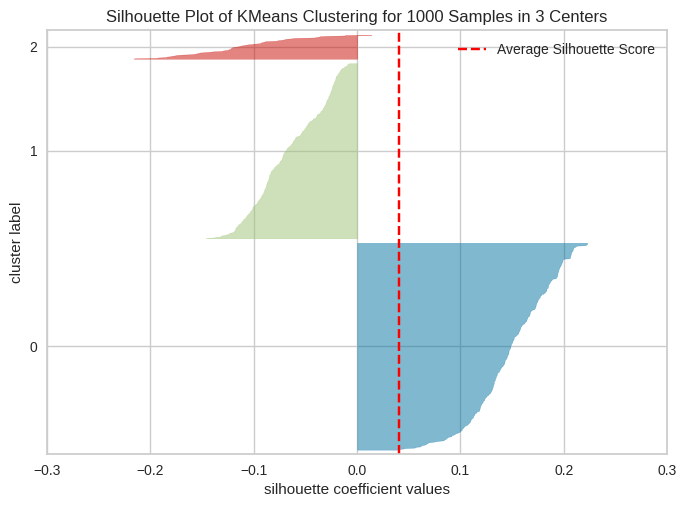

In [62]:
# kmeans-count
visualize_silhouette(bow,kmeans_model_count,"kmeans-Count Vectorizer")

Silhouette visualizer for kmeans-Tfidf Vectorizer


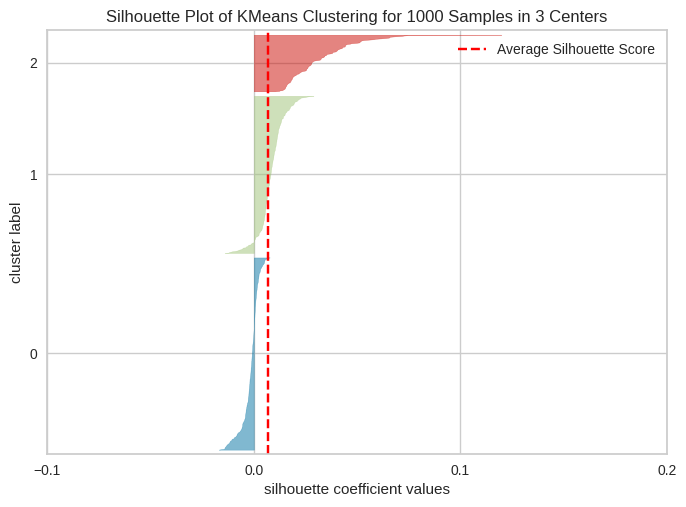

In [63]:
# kmeans-tfidf
visualize_silhouette(tfidf,kmeans_model_tfidf,"kmeans-Tfidf Vectorizer")

Silhouette visualizer for kmeans-Word2Vec Vectorizer


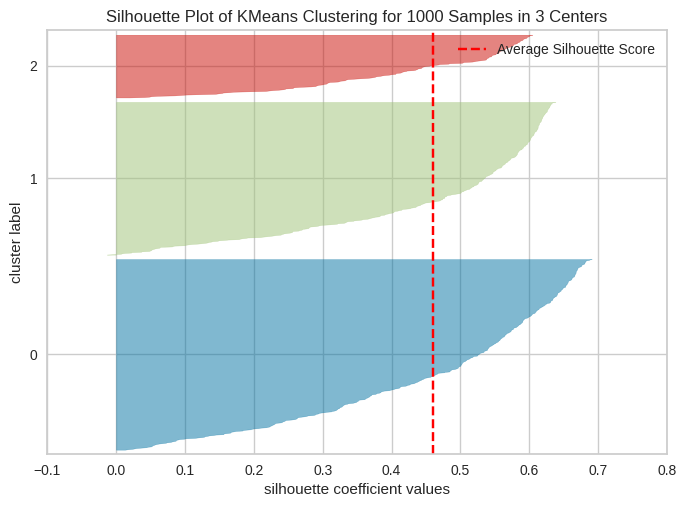

In [64]:
# kmeans-word2vec
visualize_silhouette(x_emb,kmeans_model_word2vec,"kmeans-Word2Vec Vectorizer")

In [65]:
df['target'] = pd.Series(word2vec_pred)
df

,review_body,stars,language,translated_reviews,target
0,No me sirvió de nada. La impresora no los reco...,1,es,It didn't help me at all. The printer does not...,2
1,No recomiendo su compra al mes de adquirirlo l...,1,es,I do not recommend purchasing it. One month af...,0
2,"Los cascos están bien, la calidad del sonido n...",4,es,"The headphones are good, the sound quality is ...",0
3,"Me ha llegado sin su caja original, embalado e...",2,es,"It arrived to me without its original box, pac...",0
4,"Emite calidad de imagen, aunque poca fiabilida...",2,es,"It emits image quality, although unreliable, r...",1
...,...,...,...,...,...
995,No echa agua es un ventilador con potencia par...,2,es,"It does not spray water, it is a fan with powe...",0
996,"Es bastante pequeño, pero queda muy bonito. Co...",2,es,"It's quite small, but it looks very nice. Unif...",0
997,Bombillas con buena iluminacion y durabilidad,5,es,Bulbs with good lighting and durability,1
998,"Pues eso, encaja, es lo que dicen pero se ve m...",2,es,"Well, that fits, that's what they say, but it ...",0


In [ ]:
# Unlabelled data >>>> labelled